# Lab 6


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [ ]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [ ]:
filename="../Lab.5/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [ ]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [ ]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [ ]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

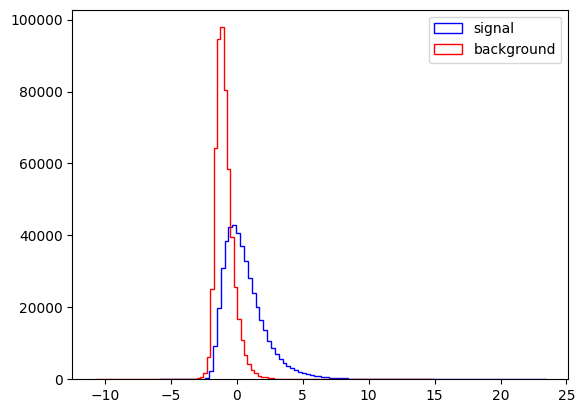

In [ ]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

In [ ]:
import sklearn.metrics as metrics

In [ ]:
# Compute the TPR and FPR for the training set
train_scores = Fisher.decision_function(X_Train)
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_Train, train_scores)

In [ ]:
# Compute the TPR and FPR for the test set
test_scores = Fisher.decision_function(X_Test)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_Test, test_scores)

In [ ]:
# Compute the AUROC score for the training and test sets
train_auc = metrics.roc_auc_score(y_Train, train_scores)
test_auc = metrics.roc_auc_score(y_Test, test_scores)

In [ ]:
# Compute the random prediction ROC curve
r_probs = [0 for _ in range(len(y_Test))]
r_fpr, r_tpr, _ = metrics.roc_curve(y_Test, r_probs)
r_auc = metrics.roc_auc_score(y_Test, r_probs)

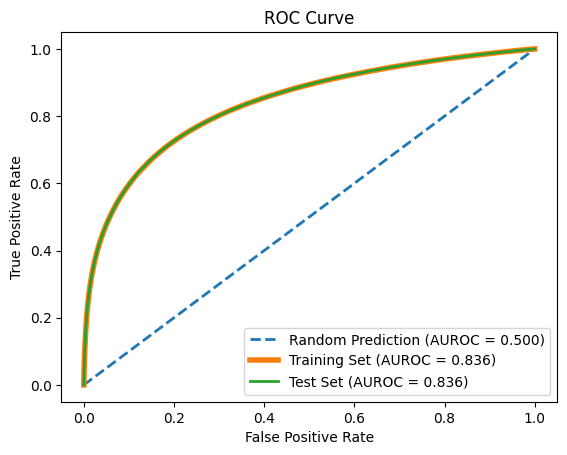

In [ ]:
# Plot the ROC curves for the training, test, and random prediction
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = %0.3f)' % r_auc, linewidth=2)
plt.plot(fpr_train, tpr_train, linestyle='-', label='Training Set (AUROC = %0.3f)' % train_auc, linewidth=4)
plt.plot(fpr_test, tpr_test, linestyle='-', label='Test Set (AUROC = %0.3f)' % test_auc, linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot.

In [ ]:
# Split the input data into raw and feature data
Raw_VarNames = ["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
                "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET"]
Features_VarNames = ["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
Raw_Data = Train_Sample[Raw_VarNames].values
Features_Data = Train_Sample[Features_VarNames].values
Combined_Data = Train_Sample[Raw_VarNames + Features_VarNames].values

In [ ]:
# Train the Fisher classifier on the raw data
Raw_Fisher = DA.LinearDiscriminantAnalysis()
Raw_Fisher.fit(Raw_Data, Train_Sample["signal"])
Raw_Fisher_scores = Raw_Fisher.decision_function(Test_Sample[Raw_VarNames].values)

In [ ]:
# Train the Fisher classifier on the feature data
Features_Fisher = DA.LinearDiscriminantAnalysis()
Features_Fisher.fit(Features_Data, Train_Sample["signal"])
Features_Fisher_scores = Features_Fisher.decision_function(Test_Sample[Features_VarNames].values)

In [ ]:
# Train the Fisher classifier on the combined raw and feature data
Combined_Fisher = DA.LinearDiscriminantAnalysis()
Combined_Fisher.fit(Combined_Data, Train_Sample["signal"])
Combined_Fisher_scores = Combined_Fisher.decision_function(Test_Sample[Raw_VarNames + Features_VarNames].values)

In [ ]:
# Compute the ROC curves and AUROC scores for each classifier
Raw_fpr, Raw_tpr, Raw_thresholds = metrics.roc_curve(Test_Sample["signal"], Raw_Fisher_scores)
Raw_auc = metrics.roc_auc_score(Test_Sample["signal"], Raw_Fisher_scores)
Features_fpr, Features_tpr, Features_thresholds = metrics.roc_curve(Test_Sample["signal"], Features_Fisher_scores)
Features_auc = metrics.roc_auc_score(Test_Sample["signal"], Features_Fisher_scores)
Combined_fpr, Combined_tpr, Combined_thresholds = metrics.roc_curve(Test_Sample["signal"], Combined_Fisher_scores)
Combined_auc = metrics.roc_auc_score(Test_Sample["signal"], Combined_Fisher_scores)

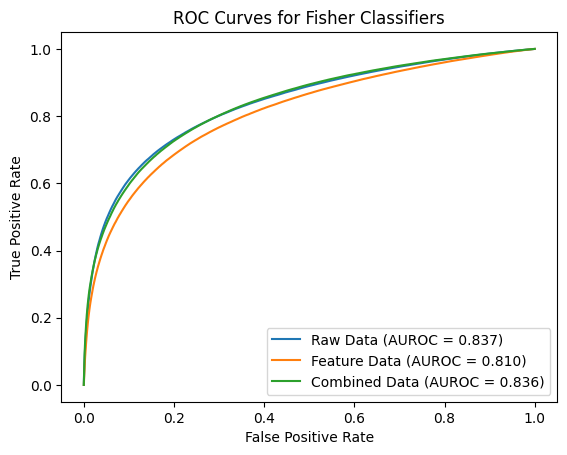

In [ ]:
plt.plot(Raw_fpr, Raw_tpr, label='Raw Data (AUROC = %0.3f)' % Raw_auc)
plt.plot(Features_fpr, Features_tpr, label='Feature Data (AUROC = %0.3f)' % Features_auc)
plt.plot(Combined_fpr, Combined_tpr, label='Combined Data (AUROC = %0.3f)' % Combined_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Fisher Classifiers')
plt.legend()


plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

### Part b

In [ ]:
def compare_fisher_performance(classifier):

    filename = "../Lab.5/SUSY.csv"
    VarNames = ["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
                "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
                "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
    df = pd.read_csv(filename, dtype='float64', names=VarNames)


    N_Train = 4000000
    Train_Sample = df[:N_Train]
    Test_Sample = df[N_Train:]

    # Split the input data into raw and feature data
    Raw_VarNames = ["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
                    "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET"]
    Features_VarNames = ["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
    Raw_Data = Train_Sample[Raw_VarNames].values
    Features_Data = Train_Sample[Features_VarNames].values
    Combined_Data = Train_Sample[Raw_VarNames + Features_VarNames].values

    # Train and evaluate Fisher classifier on raw data
    Fisher_raw = DA.LinearDiscriminantAnalysis()
    Fisher_raw.fit(Raw_Data, Train_Sample["signal"])
    Fisher_raw_scores = Fisher_raw.decision_function(Test_Sample[Raw_VarNames].values)
    Fisher_raw_fpr, Fisher_raw_tpr, Fisher_raw_thresholds = metrics.roc_curve(Test_Sample["signal"], Fisher_raw_scores)
    Fisher_raw_auc = metrics.roc_auc_score(Test_Sample["signal"], Fisher_raw_scores)

    # Train and evaluate Fisher classifier on feature data
    Fisher_features = DA.LinearDiscriminantAnalysis()
    Fisher_features.fit(Features_Data, Train_Sample["signal"])
    Fisher_features_scores = Fisher_features.decision_function(Test_Sample[Features_VarNames].values)
    Fisher_features_fpr, Fisher_features_tpr, Fisher_features_thresholds = metrics.roc_curve(Test_Sample["signal"], Fisher_features_scores)
    Fisher_features_auc = metrics.roc_auc_score(Test_Sample["signal"], Fisher_features_scores)

    # Train and evaluate Fisher classifier on combined data
    Fisher_combined = DA.LinearDiscriminantAnalysis()
    Fisher_combined.fit(Combined_Data, Train_Sample["signal"])
    Fisher_combined_scores = Fisher_combined.decision_function(Test_Sample[Raw_VarNames + Features_VarNames].values)
    Fisher_combined_fpr, Fisher_combined_tpr, Fisher_combined_thresholds = metrics.roc_curve(Test_Sample["signal"], Fisher_combined_scores)
    Fisher_combined_auc = metrics.roc_auc_score(Test_Sample["signal"], Fisher_combined_scores)

    # Plot the ROC curves for each Fisher classifier on a single plot
    plt.plot(Fisher_raw_fpr, Fisher_raw_tpr, label='Fisher on Raw Data (AUROC = %0.3f)' % Fisher_raw_auc)
    plt.plot(Fisher_features_fpr, Fisher_features_tpr, label='Fisher on Feature Data (AUROC = %0.3f)' % Fisher_features_auc)
    plt.plot(Fisher_combined_fpr, Fisher_combined_tpr, label='Fisher on Combined Data (AUROC = %0.3f)' % Fisher_combined_auc)

    # Add labels and title to the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Fisher Classifiers with %s' % type(classifier).__name__)
    plt.legend()

    # Show the plot
    plt.show()


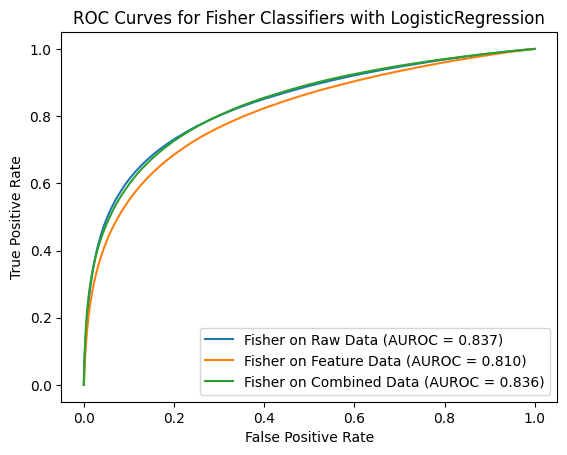

In [ ]:
import sklearn.linear_model as lm
LogReg = lm.LogisticRegression(solver='lbfgs')
compare_fisher_performance(LogReg)

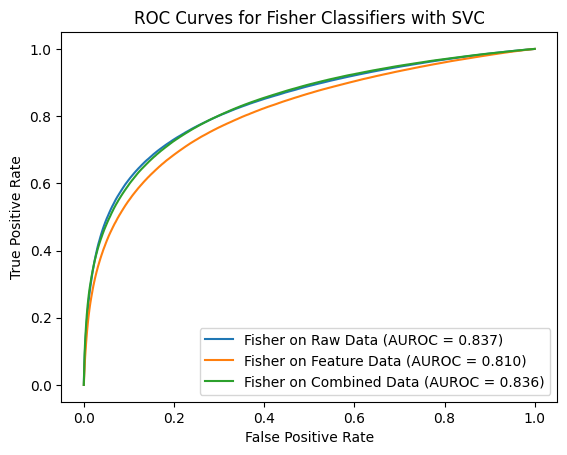

In [ ]:
import sklearn.svm as svm
SVM = svm.SVC(kernel='linear', probability=True)
compare_fisher_performance(SVM)

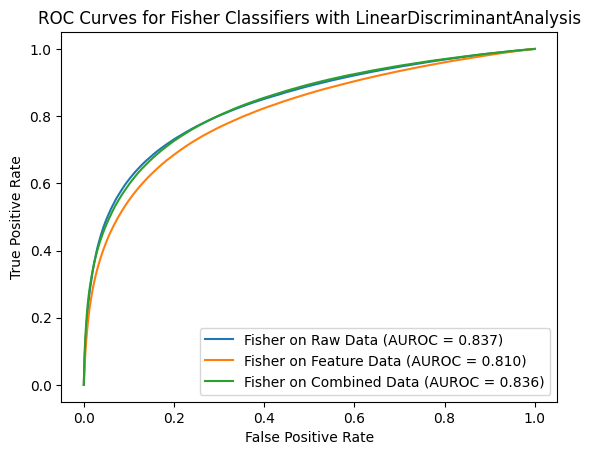

In [ ]:
import sklearn.discriminant_analysis as DA
LDA = DA.LinearDiscriminantAnalysis()
compare_fisher_performance(LDA)

### Part c

In [ ]:
# Train and evaluate Fisher classifier on combined data
Fisher = DA.LinearDiscriminantAnalysis()
Fisher.fit(Train_Sample[VarNames[1:]], Train_Sample["signal"])
Fisher_scores = Fisher.decision_function(Test_Sample[VarNames[1:]].values)

# Compute the signal and background event counts
N_S = Test_Sample[Test_Sample.signal == 1].shape[0]
N_B = Test_Sample[Test_Sample.signal == 0].shape[0]

# Compute the maximal significance
sigma_S = N_S / (N_S + N_B) ** 0.5
print("Maximal significance: %.3f" % sigma_S)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Maximal significance: 458.233


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

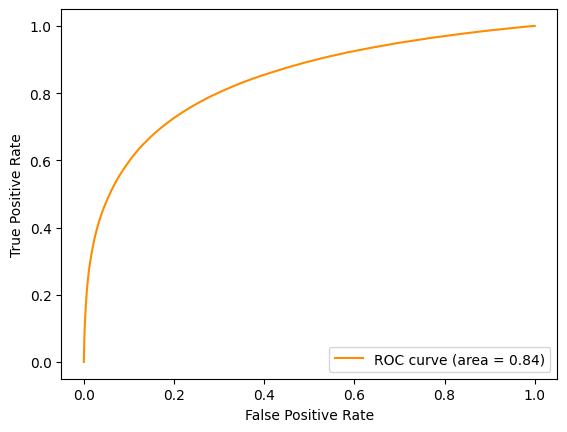

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score

# Compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and Accuracy for each scenario
metrics_dict = {}
for scenario, Fisher_scores in [('Raw', Fisher_raw_scores), ('Features', Fisher_features_scores), ('Combined', Fisher_combined_scores)]:
    fpr, tpr, _ = roc_curve(Test_Sample["signal"], Fisher_scores)
    roc_auc = auc(fpr, tpr)
    prec = precision_score(Test_Sample["signal"], Fisher_scores > 0)
    rec = recall_score(Test_Sample["signal"], Fisher_scores > 0)
    f1 = f1_score(Test_Sample["signal"], Fisher_scores > 0)
    acc = accuracy_score(Test_Sample["signal"], Fisher_scores > 0)
    metrics_dict[scenario] = {'TPR': tpr[1], 'FPR': fpr[1], 'ROC AUC': roc_auc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1, 'Accuracy': acc, 'Maximal Significance': sigma_S}

# Output metrics as a table
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')
metrics_df.index.name = 'Scenario'
print(metrics_df)


               TPR  FPR   ROC AUC  Precision    Recall  F1 Score  Accuracy  \
Scenario                                                                     
Raw       0.000002  0.0  0.761778   0.769674  0.458895  0.574977  0.689121   
Features  0.000002  0.0  0.830835   0.842708  0.572222  0.681611  0.755036   
Combined  0.000002  0.0  0.836401   0.844491  0.576977  0.685562  0.757471   

          Maximal Significance  
Scenario                        
Raw                    458.233  
Features               458.233  
Combined               458.233  
